## Ejercicio: Clasificación binaria


En este ejercicio vas a trabajar con un clasificador binario. Para ello utilizarás el dataset utilizado en el ejercicio 1, "usuarios_win_mac_lin.csv", que es un dataset en el que nos encontraremos  datos de navegación de usuarios dentro de una web (páginas, duración...) y tendremos que predecir desde qué sistema operativo viene el usuario.

Para que sea un problema binario, dado que hay 3 clases, nos vamos a quitar una de ellas. **Elimina del dataframe todas las filas que pertenezcan a la clase "1"** para quedarnos solo con 2 clases diferentes.

- Compáralo con lo que obteníamos en el ejercicio 1: ¿Se mejora la precisión del algoritmo con dos clases vs regresión lineal? ¿por qué?

*Nota: LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("data/usuarios_win_mac_lin.csv")

In [4]:
df = df[~(df['clase'] == 1)]
df.clase.unique()

array([2, 0], dtype=int64)

In [5]:
X = df.drop("clase", 1)
y = df.clase

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                   random_state = 42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
y_train

110    2
118    2
74     0
0      2
12     2
      ..
111    2
146    0
14     2
132    0
142    0
Name: clase, Length: 104, dtype: int64

In [7]:
y_pred.tolist()

[0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2]

In [8]:
df_pred = pd.DataFrame({"clase":y_test,
                        "prediction": y_pred})

df_pred["acierto"] = np.where(df_pred["clase"] == df_pred["prediction"], True, False)

In [9]:
df_pred

,clase,prediction,acierto
82,0,0,True
67,0,0,True
37,2,2,True
58,0,0,True
155,0,2,False
83,0,0,True
97,2,2,True
145,0,2,False
121,2,2,True
53,0,0,True


In [16]:
confusion_matrix(y_test, y_pred)

array([[13,  4],
       [ 0,  9]], dtype=int64)

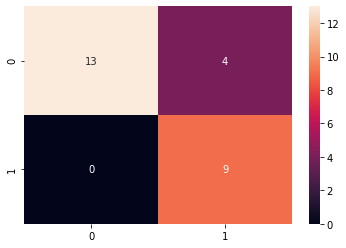

In [13]:
sns.heatmap(cof_matrix, annot=True);

In [28]:
model.score(X_test, y_test)

0.9230769230769231

In [30]:
accuracy_score(y_test, model.predict(X_test))

0.9230769230769231

In [15]:
model.classes_

array([0, 2], dtype=int64)

In [21]:
model = LogisticRegression(penalty='l1',
                          C = 4.28, solver='liblinear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.9230769230769231

In [23]:
from sklearn.model_selection import GridSearchCV

model_grid = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
              'C' : [1,2,3,4,5,6,7],
              'solver' : ['liblinear']}

clf = GridSearchCV(model_grid, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    4.4s finished


In [24]:
best_clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [25]:
best_clf.best_score_

0.9609090909090909